In [198]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy.stats as stats

In [199]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)


In [200]:
engine = new_engine('mssql', 'ERIK', 'AdventureWorks2022', integrated_security=True)

mssql://ERIK/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [201]:
connection = engine.connect()

# Kod till Deskriptiv sammanfattning 

In [202]:
# Last years sales

query0_sql = """
SELECT SUM(SalesLastYear) AS SalesLastYear
FROM Sales.SalesPerson

;
"""
result0 = pd.read_sql(query0_sql, con = connection)
result0

,SalesLastYear
0,2.368596e+07


In [203]:
# This years sales

query01_sql = """
SELECT SUM(SalesYTD) AS SalesYTD
FROM Sales.SalesPerson
;
"""
result01 = pd.read_sql(query01_sql, con = connection)
result01

,SalesYTD
0,3.627759e+07


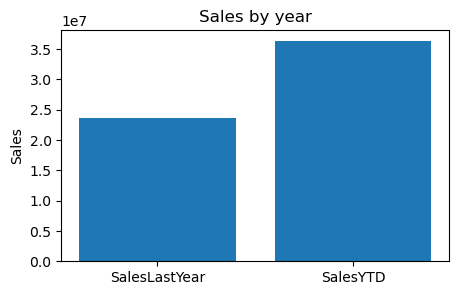

In [204]:
# Plot för last year and this years sales

fig, ax = plt.subplots(figsize=(5, 3))

# Plotting a bar chart
ax.bar(['SalesLastYear', 'SalesYTD'], [result0['SalesLastYear'].iloc[0], result01['SalesYTD'].iloc[0]])
ax.set_title('Sales by year')
ax.set_ylabel('Sales')

plt.show()

# Kod till Statistisk analys

## Query 1

In [205]:
# The origianl tabel where vacation and sick leave are found

query1_sql="""
SELECT BusinessEntityID
      ,JobTitle
      ,BirthDate
	  ,Gender
	  ,VacationHours
	  ,SickLeaveHours
	  
	  	  
FROM HumanResources.Employee 
;
"""
result1 = pd.read_sql(query1_sql,con=connection)
result1.head(100)

,BusinessEntityID,JobTitle,BirthDate,Gender,VacationHours,SickLeaveHours
0,1,Chief Executive Officer,1969-01-29,M,99,69
1,2,Vice President of Engineering,1971-08-01,F,1,20
2,3,Engineering Manager,1974-11-12,M,2,21
3,4,Senior Tool Designer,1974-12-23,M,48,80
4,5,Design Engineer,1952-09-27,F,5,22
...,...,...,...,...,...,...
95,96,Production Technician - WC50,1990-01-25,F,5,22
96,97,Production Technician - WC50,1986-03-21,M,0,20
97,98,Production Technician - WC50,1978-06-26,M,4,22
98,99,Production Technician - WC50,1979-03-29,M,2,21


## Query 2

In [206]:
# Avg and total vcation and sick leave for  male and female

query2_sql = """
SELECT SUM(SickLeaveHours) AS TotalSickLeaveHours
      ,AVG(SickLeaveHours) AS AVGSickLeaveHours
	  ,SUM(VacationHours) AS TotalVacationHours
      ,AVG(VacationHours) AS AVGVacationHours
      , Gender
FROM HumanResources.Employee
GROUP BY Gender;
;
"""
result2 = pd.read_sql(query2_sql, con=connection)
result2.head()

,TotalSickLeaveHours,AVGSickLeaveHours,TotalVacationHours,AVGVacationHours,Gender
0,3844,45,4375,52,F
1,9295,45,10303,50,M


## Query 3

In [207]:
# Male and female employee procentage 

query3_sql="""
SELECT COUNT(BusinessEntityID) AS Number
      ,Gender
	  ,COUNT(BusinessEntityID)/290.0*100 AS Percentage

FROM HumanResources.Employee
GROUP BY Gender
"""
result3 = pd.read_sql(query3_sql, con=connection)
result3.head()

,Number,Gender,Percentage
0,84,F,28.9655
1,206,M,71.0344


## Plot 1

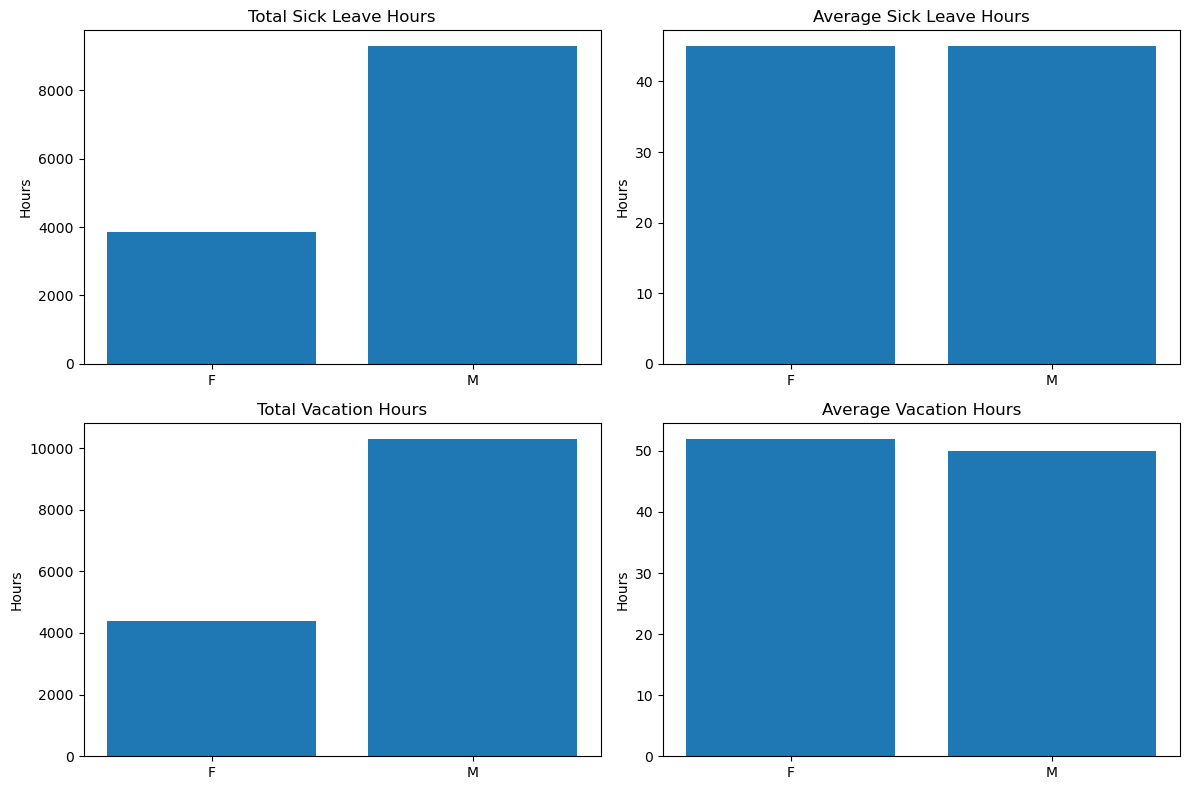

In [208]:
# Plots for avg and total vcation and sick leave for  male and female

fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize=(12, 8))

ax1.bar(result2.Gender, result2.TotalSickLeaveHours)
ax1.set_ylabel('Hours')
ax1.set_title('Total Sick Leave Hours')

ax2.bar(result2.Gender, result2.AVGSickLeaveHours)
ax2.set_ylabel('Hours')
ax2.set_title('Average Sick Leave Hours')

ax3.bar(result2.Gender, result2.TotalVacationHours)
ax3.set_ylabel('Hours')
ax3.set_title('Total Vacation Hours')

ax4.bar(result2.Gender, result2.AVGVacationHours)
ax4.set_ylabel('Hours')
ax4.set_title('Average Vacation Hours')
plt.tight_layout()
plt.show()

## Plot 2

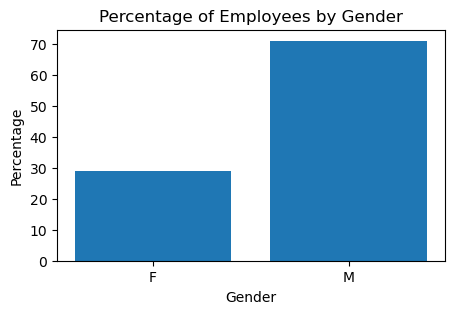

In [209]:
# Plot for male and female employee procentage 

fig, ax = plt.subplots(figsize=(5, 3))

# Plotting a bar chart
ax.bar(result3.Gender, result3.Percentage)
ax.set_title('Percentage of Employees by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')

plt.show()

## Query4

In [210]:
# Hourly salery rate for males


query4_sql ="""
/*SELECT A.BusinessEntityID
	  ,A.Rate
	  ,B.Gender
FROM HumanResources.EmployeePayHistory AS A
	     INNER JOIN HumanResources.Employee AS B ON A.BusinessEntityID = B.BusinessEntityID
WHERE Gender = 'M'*/
SELECT A.BusinessEntityID 
	  ,A.Rate
	  ,B.Gender
	  ,B.HireDate
	  
FROM HumanResources.EmployeePayHistory AS A
	     INNER JOIN HumanResources.Employee AS B ON A.BusinessEntityID = B.BusinessEntityID
WHERE HireDate > '2011-01-01' AND HireDate < '2014-01-01' AND Gender = 'M'
"""
query4_sql = pd.read_sql(query4_sql, con=connection)
query4_sql.head()

,BusinessEntityID,Rate,Gender,HireDate
0,18,14.4231,M,2011-02-07
1,273,72.1154,M,2011-02-15
2,274,48.1010,M,2011-01-04
3,275,23.0769,M,2011-05-31
4,278,23.0769,M,2011-05-31


## Query 5

In [211]:
# Hourly salery rate for females

query5_sql ="""
/*SELECT A.BusinessEntityID
	  ,A.Rate
	  ,B.Gender
FROM HumanResources.EmployeePayHistory AS A
	     INNER JOIN HumanResources.Employee AS B ON A.BusinessEntityID = B.BusinessEntityID
WHERE Gender = 'F'*/
SELECT A.BusinessEntityID 
	  ,A.Rate
	  ,B.Gender
	  ,B.HireDate
	  
FROM HumanResources.EmployeePayHistory AS A
	     INNER JOIN HumanResources.Employee AS B ON A.BusinessEntityID = B.BusinessEntityID
WHERE HireDate > '2011-01-01' AND HireDate < '2014-01-01' AND Gender ='F'
"""
query5_sql = pd.read_sql(query5_sql, con=connection)
query5_sql.head()

,BusinessEntityID,Rate,Gender,HireDate
0,15,32.6923,F,2011-01-18
1,19,13.4615,F,2011-02-14
2,20,13.4615,F,2011-01-07
3,250,9.8600,F,2011-02-25
4,250,22.5000,F,2011-02-25


## Confidence Interval

In [212]:
# Confidence Interval on male and female salery

saleryM = query4_sql.Rate
saleryF = query5_sql.Rate

ciM = stats.norm.interval(0.95, loc=np.mean(saleryM), scale=stats.sem(saleryM))
ciF = stats.norm.interval(0.95, loc=np.mean(saleryF), scale=stats.sem(saleryF))
print(f"Confidence Interval for Male Average Salery: {ciM}")
print(f"Confidence Interval for Female Average Salery: {ciF}")

Confidence Interval for Male Average Salery: (21.190798150989806, 40.035151849010205)
Confidence Interval for Female Average Salery: (18.47988759803251, 28.98745086350596)


## Hypothesis Test

In [213]:
# Hypothesis Test on male and female salery

# https://www.freecodecamp.org/news/what-is-hypothesis-testing/

# Define the null hypothesis
# H0 = 0

# Define the alternative hypothesis
# H1 > 0

# Calculate the test statistic
t_stat, p_value = stats.ttest_ind(saleryM, saleryF)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: 1.276015016680297
p-value: 0.21468622919384675
Fail to reject the null hypothesis.


## Query 6

In [215]:
# Tabel on everyone from top 10 sick leave and vacation orderd by combined sick leave and vacation hours


query6_sql ="""
WITH TopSickLeav AS (
SELECT TOP 10 
       A.BusinessEntityID
      ,B.FirstName
	  ,B.LastName
      ,A.JobTitle
	  ,E.Rate AS HourlyWage
	  ,A.Gender
	  ,A.VacationHours
	  ,A.SickLeaveHours
	  ,((A.VacationHours + A.SickLeaveHours)* E.Rate) AS MoneyLostNotWorking
	  ,C.EmailAddress
	  ,D.PhoneNumber

FROM HumanResources.Employee AS A 
    INNER JOIN Person.Person AS B ON A.BusinessEntityID = B.BusinessEntityID
	INNER JOIN Person.EmailAddress AS C ON B.BusinessEntityID = C.BusinessEntityID
	INNER JOIN Person.PersonPhone AS D ON C.BusinessEntityID = D.BusinessEntityID
	INNER JOIN HumanResources.EmployeePayHistory AS E ON D.BusinessEntityID = E.BusinessEntityID

ORDER BY A.SickLeaveHours DESC
),
TopVacationHours AS (
SELECT TOP 10 
       A.BusinessEntityID
      ,B.FirstName
	  ,B.LastName
      ,A.JobTitle
	  ,E.Rate AS HourlyWage
	  ,A.Gender
	  ,A.VacationHours
	  ,A.SickLeaveHours
	  ,((A.VacationHours + A.SickLeaveHours)* E.Rate) AS MoneyLostNotWorking
	  ,C.EmailAddress
	  ,D.PhoneNumber

FROM HumanResources.Employee AS A 
    INNER JOIN Person.Person AS B ON A.BusinessEntityID = B.BusinessEntityID
	INNER JOIN Person.EmailAddress AS C ON B.BusinessEntityID = C.BusinessEntityID
	INNER JOIN Person.PersonPhone AS D ON C.BusinessEntityID = D.BusinessEntityID
	INNER JOIN HumanResources.EmployeePayHistory AS E ON D.BusinessEntityID = E.BusinessEntityID

ORDER BY A.VacationHours DESC

)


SELECT *
FROM(
   SELECT *
    FROM TopSickLeav
   INTERSECT
   SELECT *
    FROM TopVacationHours
) 
AS IntersectResults

ORDER BY IntersectResults.SickLeaveHours + IntersectResults.VacationHours DESC
;
"""
query6_sql = pd.read_sql(query6_sql, con=connection)
query6_sql

,BusinessEntityID,FirstName,LastName,JobTitle,HourlyWage,Gender,VacationHours,SickLeaveHours,MoneyLostNotWorking,EmailAddress,PhoneNumber
0,1,Ken,Sánchez,Chief Executive Officer,125.50,M,99,69,21084.00,ken0@adventure-works.com,697-555-0142
1,88,Betsy,Stadick,Production Technician - WC10,13.45,F,99,69,2259.60,betsy0@adventure-works.com,405-555-0171
2,117,Chad,Niswonger,Production Technician - WC50,11.00,M,99,69,1848.00,chad0@adventure-works.com,559-555-0175
3,124,Kim,Ralls,Stocker,9.00,F,98,69,1503.00,kim0@adventure-works.com,309-555-0129
4,92,Tom,Vande Velde,Production Technician - WC10,13.45,M,98,69,2246.15,tom0@adventure-works.com,295-555-0161
5,116,Michael,Patten,Production Technician - WC50,11.00,M,98,69,1837.00,michael2@adventure-works.com,441-555-0195
6,122,Susan,Eaton,Stocker,9.00,F,97,68,1485.00,susan0@adventure-works.com,943-555-0196
